In [206]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pickle
import string
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /Users/keri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [192]:
df = pd.read_csv('cleaned_recyclestyle.csv')

In [195]:
df.shape

(2065, 106)

In [193]:
#many brands have a trailing space
def clean_brand(brand):
    return(brand.strip())

In [194]:
df['brand'] = df['brand'].apply(clean_brand)

In [6]:
df['generalized_category'].unique()

array(['lower', 'full_body', 'shoes', 'upper', 'outerwear', 'headwear',
       'accessory', 'bag'], dtype=object)

In [196]:
df = df.drop(columns=['INNER SOLE'])
df.shape

(2065, 105)

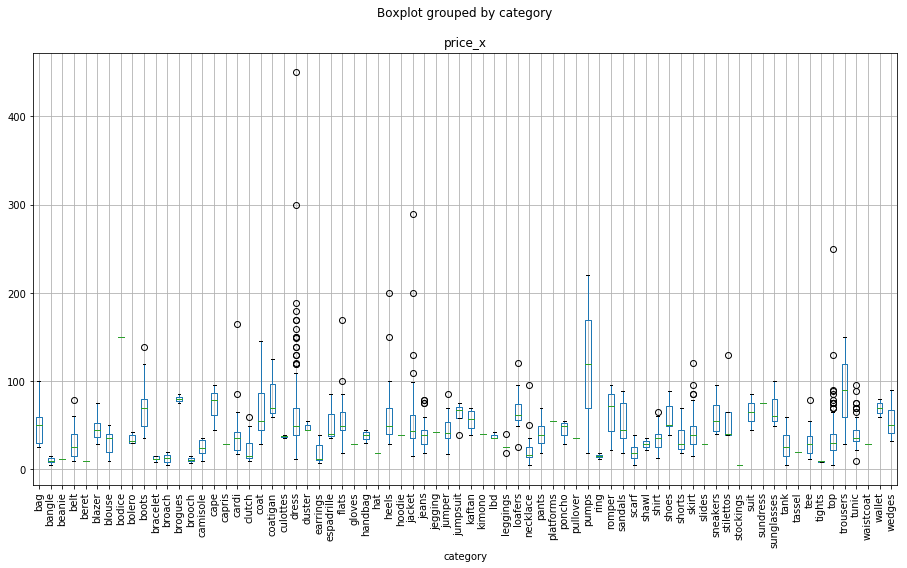

In [835]:
df.boxplot(column='price_x', by='category',figsize=(15,8),rot=90)
plt.savefig('data/box_plot_all_with_outliers')

# Outlier research

In [11]:
df[df['price_x'] > 199]

,price_x,size,brand,category,fabric_0,fabric_1,fabric_2,fabric_3,fabric_4,fabric_5,...,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,condition_11,condition_12,condition_13,condition_14
280,300.0,10-20,CAMILLA,dress,silk,unknown,unknown,unknown,unknown,unknown,...,,,,,,,,,,
933,220.0,40,GUCCI,pumps,unknown,unknown,unknown,unknown,unknown,unknown,...,,,,,,,,,,
1120,200.0,40,JIMMY CHOO,heels,look,linen,hemp,leather,textile,unknown,...,,,,,,,,,,
1255,250.0,12,MATICEVSKI,top,polyester,nylon,cotton,silk,elastane,unknown,...,,,,,,,,,,
1257,450.0,12,MATICEVSKI,dress,nylon,cotton,silk,elastane,underskirt,unknown,...,,,,,,,,,,
1409,289.0,10,MOOCHI,jacket,leather,acetate,viscose,unknown,unknown,unknown,...,,,,,,,,,,
1415,200.0,10,MOOCHI,jacket,leather,polyester,unknown,unknown,unknown,unknown,...,,,,,,,,,,


In [153]:
no_outliers = df

In [154]:
no_outliers.loc[[280,1257],'price_x'] = 200.0 #takes care of the dress outliers

In [155]:
no_outliers.loc[1255,'price_x'] = 130.0 #set at value of next highest priced skirt

In [157]:
no_outliers.loc[1409,'price_x'] = 200.0 #set at value of next highest priced jacket

In [160]:
no_outliers.loc[1120,'price_x'] = 150.0 #set at value of next highest priced heels

In [159]:
df[df['category'] == 'heels'].sort_values(by='price_x', ascending=False)

,price_x,size,brand,category,fabric_0,fabric_1,fabric_2,fabric_3,fabric_4,fabric_5,...,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,condition_11,condition_12,condition_13,condition_14
1120,200.0,40,JIMMY CHOO,heels,look,linen,hemp,leather,textile,unknown,...,,,,,,,,,,
934,150.0,38,GUCCI,heels,leather,textile,unknown,unknown,unknown,unknown,...,preloved,good,,,,,,,,
1044,100.0,38,IXOS,heels,leather,leather/synthetic,unknown,unknown,unknown,unknown,...,,,,,,,,,,
747,99.0,40,EOS,heels,leather,risen,unknown,unknown,unknown,unknown,...,,,,,,,,,,
830,95.0,9,FRANKIE4,heels,leather,rubber,unknown,unknown,unknown,unknown,...,,,,,,,,,,
243,79.0,39,BRIARWOOD,heels,leather,non,unknown,unknown,unknown,unknown,...,,,,,,,,,,
1403,79.0,40,MODE COLLECTIVE,heels,leather,suede,&,synthetic,unknown,unknown,...,,,,,,,,,,
829,79.0,10,FRANKIE4,heels,leather,rubber,unknown,unknown,unknown,unknown,...,,,,,,,,,,
937,79.0,8,GUESS,heels,leather,leather/textile,unknown,unknown,unknown,unknown,...,,,,,,,,,,
1017,69.0,41,ISABELLA ANSELMI,heels,leather,man,made,unknown,unknown,unknown,...,,,,,,,,,,


In [285]:
no_outliers.shape

(2065, 105)

# Plotting standard deviation, price distribution for categories over 50 and general categories

In [805]:
std = df.groupby(by='category').std()

In [820]:
categories_to_plot = df.groupby(by='category')['category'].count()

In [822]:
std['count'] = categories_to_plot.values

In [823]:
std.head()

,price_x,count
category,,
bag,21.240891,19
bangle,2.891995,11
beanie,NaN,1
belt,20.447243,13
beret,NaN,1


In [824]:
categories = std.sort_values(by='count',ascending=False)

In [827]:
categories.head()

,price_x,count
category,,
dress,33.850681,499
top,19.692876,349
skirt,16.638680,187
pants,12.721383,116
jacket,37.702393,88


In [828]:
errors = std['price_x']

In [831]:
std[std.index == 'pumps']

,price_x,count
category,,
pumps,142.128463,2


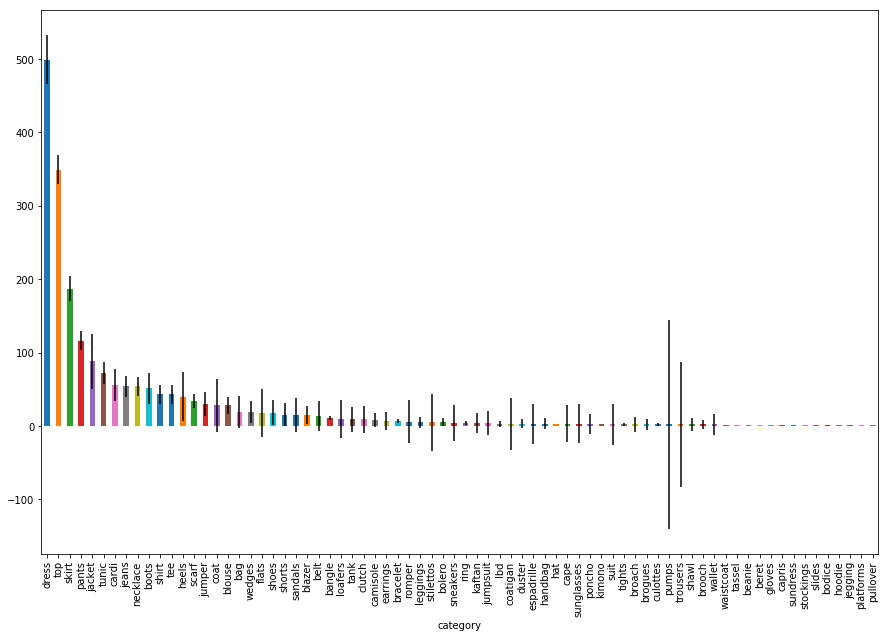

In [832]:
categories.plot(y='count', kind='bar',figsize=(15,10),yerr=errors,legend=False)
plt.savefig('data/category_barchart_std.png')

In [781]:
#plotting categories that have at least 50 items
categories_to_plot = categories_to_plot.index[categories_to_plot > 50]

In [839]:
std_10plus = std[std['count'] > 10]

In [844]:
std_10plus = std_10plus.sort_values(by='count',ascending=False)
errors = std_10plus['price_x']

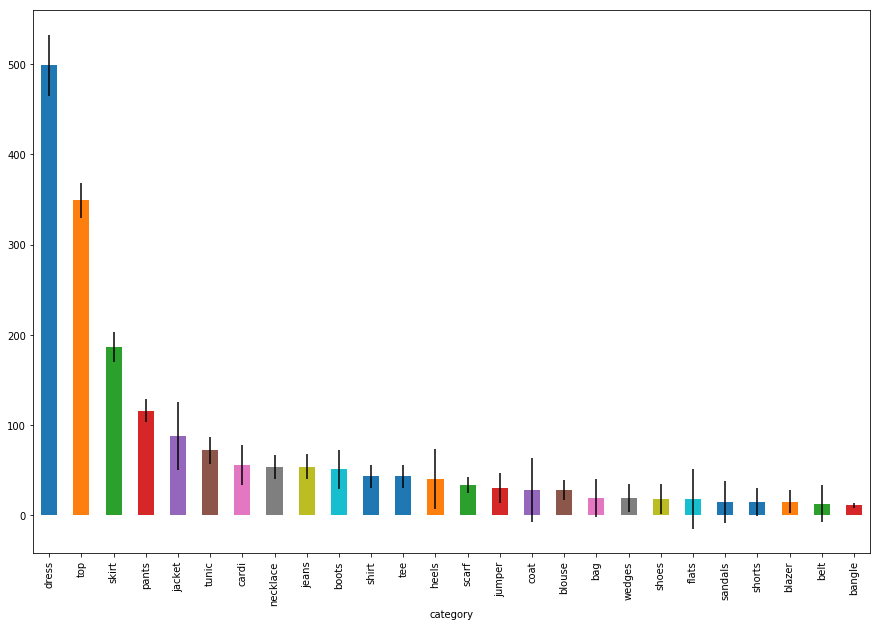

In [845]:
std_10plus.plot(y='count', kind='bar',figsize=(15,10),yerr=errors,legend=False)
plt.savefig('data/category10plus_barchart_std.png')

In [782]:
categories_to_plot

Index(['boots', 'cardi', 'dress', 'jacket', 'jeans', 'necklace', 'pants',
       'skirt', 'top', 'tunic'],
      dtype='object', name='category')

In [783]:
boots = std_df['price_x'][std_df['category'] == 'boots']
cardi = std_df['price_x'][std_df['category'] == 'cardi']
dress = std_df['price_x'][std_df['category'] == 'dress']
jacket = std_df['price_x'][std_df['category'] == 'jacket']
jeans = std_df['price_x'][std_df['category'] == 'jeans']
necklace = std_df['price_x'][std_df['category'] == 'necklace']
pants = std_df['price_x'][std_df['category'] == 'pants']
skirt = std_df['price_x'][std_df['category'] == 'skirt']
top = std_df['price_x'][std_df['category'] == 'top']
tunic = std_df['price_x'][std_df['category'] == 'tunic']

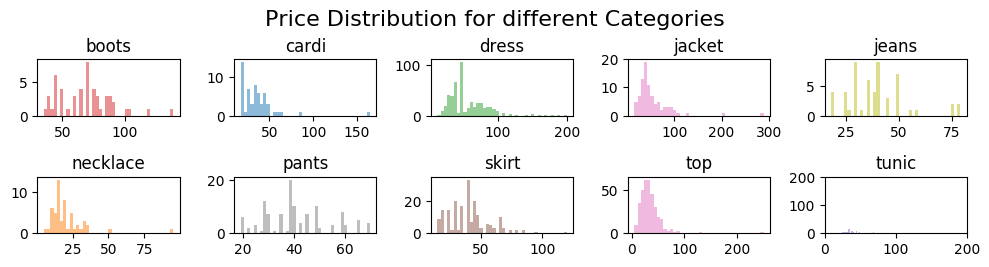

In [784]:
# Plot
fig, axes = plt.subplots(2, 5, figsize=(10,2.5), dpi=100, sharex=False, sharey=False)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive', 'tab:orange','tab:grey',
          'tab:brown','tab:pink','tab:purple']

for i, (ax, category) in enumerate(zip(axes.flatten(), categories_to_plot)):
    x = std_df.loc[std_df['category']==category, 'price_x']
    ax.hist(x, alpha=0.5, bins=40, stacked=True, label=str(category), color=colors[i])
    ax.set_title(category)

plt.suptitle('Price Distribution for different Categories', y=1.05, size=16)
ax.set_xlim(0, 200); ax.set_ylim(0,200);
plt.tight_layout();
plt.savefig('data/prict_distribution_over50.png')

In [141]:
df['generalized_category'].unique()

array(['lower', 'full_body', 'shoes', 'upper', 'outerwear', 'headwear',
       'accessory', 'bag'], dtype=object)

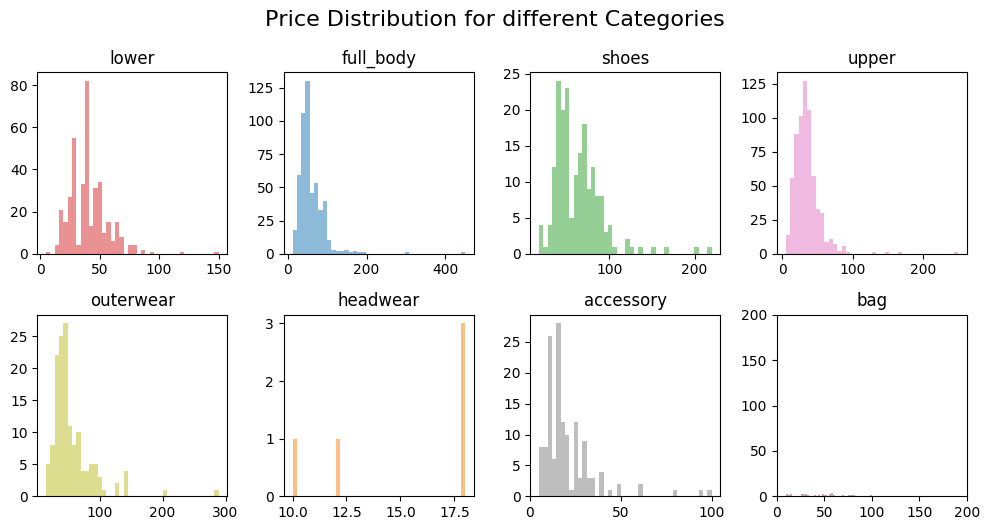

In [833]:
fig, axes = plt.subplots(2, 4, figsize=(10,5), dpi=100, sharex=False, sharey=False)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive', 'tab:orange','tab:grey',
          'tab:brown']

for i, (ax, category) in enumerate(zip(axes.flatten(), df['generalized_category'].unique())):
    x = df.loc[df['generalized_category']==category, 'price_x']
    ax.hist(x, alpha=0.5, bins=40, stacked=True, label=str(category), color=colors[i])
    ax.set_title(category)

plt.suptitle('Price Distribution for different Categories', y=1.05, size=16)
ax.set_xlim(0, 200); ax.set_ylim(0,200);
plt.tight_layout();
plt.savefig('data/price_distribution_general_categories_over50')

# Running models using df with no outliers

In [162]:
upper = no_outliers[no_outliers['generalized_category'] == 'upper']
lower = no_outliers[no_outliers['generalized_category'] == 'lower']
outerwear = no_outliers[no_outliers['generalized_category'] == 'outerwear']
headwear = no_outliers[no_outliers['generalized_category'] == 'headwear']
full_body = no_outliers[no_outliers['generalized_category'] == 'full_body']
shoes = no_outliers[no_outliers['generalized_category'] == 'shoes']
bag = no_outliers[no_outliers['generalized_category'] == 'bag']
accessory = no_outliers[no_outliers['generalized_category'] == 'accessory']

df_list = [upper, lower, outerwear, full_body, shoes, bag, accessory]

models = ['upper','lower','outerwear','full_body','shoes','bag','accessory']
for i in range(len(models)):
    print('Model : ',models[i])
    run_regressiontree(df_list[i])
    print(' ')

In [175]:
upper = upper.drop(columns=['condition_9', 'condition_10', 'condition_11', 'condition_12',
       'condition_13', 'condition_14','generalized_category','color','fabric_6','text_5'], inplace=True)
#nothing above condition_8
#nothing over color_6
#nothing over notes_38
lower = lower.drop(columns=['color_7','condition_7','condition_8','condition_9', 'condition_10', 'condition_11', 'condition_12',
       'condition_13', 'condition_14','generalized_category','color','notes_39', 'notes_40',
       'notes_41', 'notes_42', 'notes_43', 'notes_44', 'notes_45', 'notes_46',
       'notes_47', 'notes_48', 'notes_49', 'notes_50', 'notes_51', 'notes_52',
       'notes_53', 'notes_54', 'notes_55', 'notes_56', 'notes_57', 'notes_58',
       'notes_59', 'notes_60', 'notes_61', 'notes_62'])
#nothing over color_4
#nothing over fabric_6
#nothing over notes_32
#nothing over condition_12
outerwear = outerwear.drop(columns=['color_7','color_6','color_5',
       'condition_13', 'condition_14','generalized_category','color','notes_39', 'notes_40',
       'notes_41', 'notes_42', 'notes_43', 'notes_44', 'notes_45', 'notes_46',
       'notes_47', 'notes_48', 'notes_49', 'notes_50', 'notes_51', 'notes_52',
       'notes_53', 'notes_54', 'notes_55', 'notes_56', 'notes_57', 'notes_58',
       'notes_59', 'notes_60', 'notes_61', 'notes_62'])

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [177]:
models = ['upper','lower','outerwear']
print('after columns with no data were deleted for outerwear, upper, lower')
for i in range(len(models)):
    print('Model : ',models[i])
    run_regressiontree(df_list[i])
    print(' ')

after columns with no data were deleted for outerwear, upper, lower
Model :  upper
(652, 94)
(436, 94)
(216, 94)
(436,)
(216,)
score:  0.0974783715171
Mean Absolute Error: 9.93 degrees.
Accuracy: 63.69 %.
 
Model :  lower
(387, 104)
(259, 104)
(128, 104)
(259,)
(128,)
score:  0.126470106455
Mean Absolute Error: 10.33 degrees.
Accuracy: 67.73 %.
 
Model :  outerwear
(146, 104)
(97, 104)
(49, 104)
(97,)
(49,)
score:  -0.091176692266
Mean Absolute Error: 25.02 degrees.
Accuracy: 51.43 %.
 


# Using random forest regressor parameters: regr = RandomForestRegressor(max_depth=4, random_state=1, n_estimators=500)


    after columns with no data were deleted for outerwear, upper, lower
    Model :  upper
    (652, 94)
    (436, 94)
    (216, 94)
    (436,)
    (216,)
    score:  0.0974783715171
    Mean Absolute Error: 9.93 degrees.
    Accuracy: 63.69 %.

    Model :  lower
    (387, 104)
    (259, 104)
    (128, 104)
    (259,)
    (128,)
    score:  0.126470106455
    Mean Absolute Error: 10.33 degrees.
    Accuracy: 67.73 %.

    Model :  outerwear
    (146, 104)
    (97, 104)
    (49, 104)
    (97,)
    (49,)
    score:  -0.091176692266
    Mean Absolute Error: 25.02 degrees.
    Accuracy: 51.43 %.

In [179]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [309]:
def create_corpus(df):
    '''Combines text from columns: NOTES, FABRIC, cleaned_text, COLOUR, CONDITION 
        into a corpus df['combined'] to be passed into Vectorizer'''
    df.fillna('')
    df['combined'] = df['CONDITION']+ ' ' + df['NOTES'] + ' ' + df['FABRIC'] + ' ' + df['COLOUR'] + df['cleaned_text']
    corpus = df['combined']
    return(corpus ,df)


def fit_nmf(X, n_components=8):
    '''create model with n_components = latent features
        input : matrix
        output : model object'''
    nmf = NMF(n_components)
    nmf.fit(X)
    return(nmf)

def transform_nmf(X,nmf):
    W = nmf.transform(X)
    H = nmf.components_
    return(W,H)

def make_dataframe(matrix1, matrix2, categories,features):
    W, H = (x for x in (matrix1,matrix2))
    return( pd.DataFrame(W,index=categories), pd.DataFrame(H,columns=features) )

# def tfidf_fit(corpus,max_features=400):
#     '''Takes the combined text for each product and runs the tfidf vectorizer using the top n_features number of words'''
#     vec = TfidfVectorizer(stop_words=stopwords_,strip_accents=None,max_features=max_features)
#     vec.fit(corpus)
#     return(vec)


def train_model(product_type):
    #asins, four_five_df = get_product_df(product_type)
    corpus = create_corpus(four_five_df)
    vec = tfidf_fit(corpus)
    nmf = fit_nmf(X, asins, features)
    return(vec,nmf)

def tfidf_fit(corpus,n_features=200):
    '''Takes the combined text and runs the tfidf vectorizer using top n_features (# of words)''
    vec = TfidfVectorizer(stop_words=stopwords_,strip_accents=None,max_features=n_features)
    vec.fit(corpus)
    return(vec)

def tfidf_transform(vec,corpus):
    X = vec.transform(corpus)
    X = X.toarray()
    features = vec.get_feature_names()
    return(X, features)

# Taking care of missing data with tf-idf and nmf with latent features = generalized categories

In [197]:
print(df.head(2))

print(df.columns)

print(df.shape)

#taking the condition, fabric, notes, color
nlp_data = df.drop(columns = ['price_x','brand','category','size','generalized_category','color'])

print(nlp_data.head(2))

print(nlp_data.shape)

text_all_rows = nlp_data.values

print(text_all_rows.shape)

,price_x,size,brand,category,fabric_0,fabric_1,fabric_2,fabric_3,fabric_4,fabric_5,fabric_6,generalized_category,color,color_0,color_1,color_2,color_3,color_4,color_5,color_6,color_7,notes_0,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,notes_10,notes_11,notes_12,notes_13,notes_14,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,notes_21,notes_22,notes_23,notes_24,notes_25,notes_26,notes_27,notes_28,notes_29,notes_30,notes_31,notes_32,notes_33,notes_34,notes_35,notes_36,notes_37,notes_38,notes_39,notes_40,notes_41,notes_42,notes_43,notes_44,notes_45,notes_46,notes_47,notes_48,notes_49,notes_50,notes_51,notes_52,notes_53,notes_54,notes_55,notes_56,notes_57,notes_58,notes_59,notes_60,notes_61,notes_62,text_0,text_1,text_2,text_3,text_4,text_5,condition_0,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,condition_11,condition_12,condition_13,condition_14
0,40.0,16,@EMGIRL,skirt,polynosic,wool,polyester,unknown,unknown,unknown,unknown,lower,['black'],black,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,blend,wool,,,,,excellent,preloved,,,,,,,,,,,,,
1,45.0,12,A WEAR,dress,polyeseter,unknown,unknown,unknown,unknown,unknown,unknown,full_body,['black'],black,,,,,,,,thick,fitted,stretch,ribbed,pleats,zip,little,skirt,back,bodice,waist,semi,access,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,ribbed,swing,emerald,,,,excellent,preloved,,,,,,,,,,,,,
2,95.0,8,ADIDAS,sneakers,synthetic,unknown,unknown,unknown,unknown,unknown,unknown,shoes,"['khaki', 'white']",khaki,white,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,run,khaki,metallic,swift,,,worn,hardly,like,new,,,,,,,,,,,
3,49.0,8,AEROSOLES,loafers,leather,rubber,unknown,unknown,unknown,unknown,unknown,shoes,"['bronze', 'gold']",bronze,gold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,leather,gold,,,,,preloved,good,marks,scuff,,,,,,,,,,,
4,25.0,10,ALANNAH HILL,dress,polyester,wool,viscose,polyamide,elastane,unknown,unknown,full_body,"['black', 'brown', 'charcoal']",black,brown,charcoal,,,,,,pockets,lined,front,zip,place,back,shoulder,straps,button,australia,access,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,pinafore,blend,wool,,,,drycleaning,preloved,good,requires,,,,,,,,,,,


# Creating corpus for tf-idf using cleaned recyclestyle_outer_join cv

In [ ]:
#using original dataframe with the color, notes, fabric, and condition in separate columns but single string
df2 = pd.read_csv('data/recyclestyle_outer_join.csv')
df2= df2[['CONDITION','NOTES','FABRIC','cleaned_text','COLOUR','text']]

#combined_review = temp.review_text.str.cat(sep=' ')
df2['combined'] = df2['CONDITION']+ ' ' + df2['NOTES'] + ' ' + df2['FABRIC'] + ' ' + df2['COLOUR'] + df2['cleaned_text']

df2 = df2.fillna('')

df2.head(2)

stopwords_ = stopwords.words('english')

In [438]:
corpus, tf_df = create_corpus(df2)

df2.shape

vec = tfidf_fit(corpus) #returns a vectorized matrix of shape ()

#extended after first iteration, looking at features
#stopwords_.extend(['10','100','20', '25','30','35','40','45','50','55','60','65','70','75','95','97','98','80'])

X,features = tfidf_transform(vec,corpus)

X.shape #max_features, number of items (rows in original df)

nmf = fit_nmf(X)

nmf

W, H = transform_nmf(X,nmf)

df_title = pd.read_csv('data/recyclestyle_outer_join.csv')
df_title.shape

titles = df_title['text']

W_df, H_df = make_dataframe(W,H,titles,features)

W_df.shape

H_df

H_df.shape

df2.head()

#combine the df without color, fabric, notes, condition
df3 = df_title[['price_x','size','brand','category','text']]
df3.shape

df3.head()

Wdf_reset = W_df.reset_index()
Wdf_reset.head()

combined_nmf_df = pd.merge(df3,Wdf_reset,on='text',)

combined_nmf_df.head()

In [345]:
#save the df so it can be opened and cleaned in cleaning notebook
combined_nmf_df.to_csv('nmf_df.csv',index=False, header=True)

# Creating df using the tf vector, no nmf. Merging with the cleaned_nmf_df

In [460]:
#getting the matrix to use in ML without the nmf
tfidf_matrix = vec.transform(corpus)
tfidf_matrix = tfidf_matrix.todense()

tfidf_matrix.shape

#putting the matrix at the end of df2 so it can be merged with cleaned_nmf_df
temp2 = pd.DataFrame(tfidf_matrix,columns=features)

temp2.head()

temp2.shape

df2.head()

#result = pd.concat([df1, s1], axis=1, ignore_index=True)
merged_tfdf = pd.concat([temp2,df2], axis=1)

merged_tfdf.head()

,2014,2016,access,acetate,acrylic,adjustable,ankle,au,australia,back,bead,beaded,beige,belt,black,blackblack,blackleather,blend,blue,blush,bn,bodice,body,brand,brown,button,buttons,charcoal,chiffon,collection,comes,contrast,cotton,cream,crop,curved,cut,dark,denim,designer,detail,drape,drawstring,dress,elastane,elasticated,embroidered,ends,excellent,eye,fabric,fastening,fastens,features,fit,flared,floral,front,fully,give,glass,gold,good,green,grey,half,hardly,heel,hem,hemline,high,hook,ita,khaki,knit,label,lace,layer,leather,leg,length,light,like,lined,linen,lining,long,look,low,lycra,lyocell,made,man,marks,matching,maxi,merino,mesh,metal,metallic,midi,multi,nape,navy,neck,neckline,never,new,noticeable,nylon,nz,one,open,orange,padding,panel,pencil,perfect,pink,place,pleat,pleated,plenty,pocket,pockets,polyamide,polyester,ponte,preloved,print,printed,pull,purple,rayon,red,relaxed,removed,required,resin,ribbed,rose,rubber,ruffle,ruffled,satin,sequin,sheer,shift,shirt,shoulder,shoulders,side,silhouette,silk,silver,single,skinny,skirt,sleeve,sleeves,slip,small,snap,soft,sole,spandex,split,splits,spring,strap,straps,stretch,stripe,style,summer,synthetic,tag,tags,tee,textile,tie,ties,top,trim,tunic,two,upper,velvet,viscose,waist,wear,white,whitestripe,wide,winter,wool,worn,wrap,yellow,zip,CONDITION,NOTES,FABRIC,cleaned_text,COLOUR,text,combined
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.625215,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.239455,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.334303,0.0,0.216305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.627074,0.000000,0.0,0.0,0.000000,Excellent preloved,,"50% wool, 30% polynosic, 20% polyester",Wool blend,Black,@EMGIRL - Wool blend skirt! 16,"Excellent preloved 50% wool, 30% polynosic,..."
1,0.0,0.0,0.209251,0.0,0.0,0.0,0.0,0.0,0.000000,0.200572,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.34319,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.099529,0.0,0.134615,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.089907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.721278,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.353048,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.137916,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.248049,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.191470,Excellent preloved,Thick ribbed fabric with a little stretch. ...,Polyeseter,Emerald ribbed swing,Black,A WEAR - Emerald ribbed swing dress! 12,Excellent preloved Thick ribbed fabric with...
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0

In [467]:
merged_tfdf_cleaned_nmf = pd.merge(merged_tfdf,cleaned_nmf_df, on='text')

In [469]:
merged_tfdf_cleaned_nmf.head(2)

,2014,2016,access,acetate,acrylic,adjustable,ankle,au,australia,back,bead,beaded,beige,belt,black,blackblack,blackleather,blend,blue,blush,bn,bodice,body,brand_x,brown,button,buttons,charcoal,chiffon,collection,comes,contrast,cotton,cream,crop,curved,cut,dark,denim,designer,detail,drape,drawstring,dress,elastane,elasticated,embroidered,ends,excellent,eye,fabric,fastening,fastens,features,fit,flared,floral,front,fully,give,glass,gold,good,green,grey,half,hardly,heel,hem,hemline,high,hook,ita,khaki,knit,label,lace,layer,leather,leg,length,light,like,lined,linen,lining,long,look,low,lycra,lyocell,made,man,marks,matching,maxi,merino,mesh,metal,metallic,midi,multi,nape,navy,neck,neckline,never,new,noticeable,nylon,nz,one,open,orange,padding,panel,pencil,perfect,pink,place,pleat,pleated,plenty,pocket,pockets,polyamide,polyester,ponte,preloved,print,printed,pull,purple,rayon,red,relaxed,removed,required,resin,ribbed,rose,rubber,ruffle,ruffled,satin,sequin,sheer,shift,shirt,shoulder,shoulders,side,silhouette,silk,silver,single,skinny,skirt,sleeve,sleeves,slip,small,snap,soft,sole,spandex,split,splits,spring,strap,straps,stretch,stripe,style,summer,synthetic,tag,tags,tee,textile,tie,ties,top,trim,tunic,two,upper,velvet,viscose,waist,wear,white,whitestripe,wide,winter,wool,worn,wrap,yellow,zip,CONDITION,NOTES,FABRIC,cleaned_text,COLOUR,text,combined,price_x,size,brand_y,category,0,1,2,3,4,5,6,7,generalized_category,"(217, 'category')","(217, 'generalized_category')","(406, 'category')","(406, 'generalized_category')"
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625215,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239455,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.334303,0.0,0.216305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.627074,0.0,0.0,0.0,0.00000,Excellent preloved,,"50% wool, 30% polynosic, 20% polyester",Wool blend,Black,@EMGIRL - Wool blend skirt! 16,"Excellent preloved 50% wool, 30% polynosic,...",40.0,16,@EMGIRL,skirt,0.038180,0.0,0.020948,0.011230,0.079904,0.0,0.0,0.025348,lower,dress,upper,shoes,shoes
1,0.0,0.0,0.209251,0.0,0.0,0.0,0.0,0.0,0.0,0.200572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.34319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.099529,0.0,0.134615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.089907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.721278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.353048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248049,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.19147,Excellent preloved,Thick ribbed fabric with a little stretch. ...,Polyeseter,Emerald ribbed swing,Black,A WEAR - Emerald ribbed swing dress! 12,Excellent preloved Thick ribbed fabric with...,45.0,12,A WEAR,dress,0.007442,0.0,0.000000,0.021561,0.101040,0.0,0.0,0.005943,full_body,dress,upper,shoes,shoes


In [470]:
#deleting columns that we don't need
merged_tfdf_final = merged_tfdf_cleaned_nmf.drop(columns=['text',"(217, 'category')", 'COLOUR','CONDITION','cleaned_text',
       "(217, 'generalized_category')", "(406, 'category')", 'FABRIC', 'text','NOTES',"(406, 'generalized_category')",
        '1','2','3','4','5','6','7','0'])

In [471]:
merged_tfdf_final.to_csv('merged_tfdf_nmf',header=True,index=False)

In [654]:
def run_regressiontree(df, max_depth=3, n_estimators=500, max_features=0.5):
    #df = df.fillna(' ')
    df_y = df['price_x']
    df_x = df.drop(columns=['price_x'])

    le = preprocessing.LabelEncoder()
    df_x = df_x.apply(le.fit_transform)

    X = df_x.values
    print('shape of X ', X.shape)


    X_train, X_test, y_train, y_test = train_test_split(
         X, df_y, test_size=0.33, random_state=108)

    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    #regr = RandomForestRegressor(n_estimators=500, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)

    regr = RandomForestRegressor(max_depth=max_depth, random_state=3,verbose=False,
                                 n_estimators=n_estimators, max_features=max_features,n_jobs=-1, oob_score=True)

    regr.fit(X_train, y_train) 

    pred_y = regr.predict(X_test)

    print('score: ' , regr.score(X_test, y_test))

    # Calculate the absolute errors
    errors = abs(pred_y - y_test)

    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)

    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    
    print_score(regr, X_train, y_train, X_test, y_test)
    return(regr, mape, accuracy)

# Modeling with title (cleaned and separated), price, color, and fabric

In [485]:
import matplotlib.colors as mcolors

In [532]:
stopwords_.append('unknown')

In [ ]:
#culling the colors if they are in this list, then go into one long string
colordict = mcolors.cnames

fabriclist = ["acetate","antron","bamboo","bisso","blend","boiled","boucle","carbon-infused",
"charmeuse","chenille","chiffon","chino","chintz","combed","coolmax","corduroy","cord","cotton",
"lisle","damask","double","ecosil","polyester","egyptian","elastane","eyelet","faille","fiberfill","french","gaberdine","hemp","hydrophilic",
"hydrophobic","interlock","italian","jacquard","jersey","knit","lace","lame","latex","linen","lining","lycra","lyocell",
"memory","foam","mercerised","mercerized","merino","mesh","micro","modal","microfiber","microfibre","microfleece",
"fleece","neoprene","nylon","olefin","panne","peau de soie","peruvian","pima","pique","polyamide","polyester",
"powernet","rayon","rib","sanforized","satin","sateen","silicone","silk","soy","spandex","spannette","supima",
"supplex","tactel","tencel","themastat","tricot","velour","velvet","viscose","vinyl","wool","woven","x-static"]

#culling the fabrics if they aren't in this fabric dictionary
fabricdict = {i : '' for i in fabriclist}

def color_check(text):
    if text in colordict.keys():
        return(text)
    else:
        return('')
    
def fabric_check(text):
    if text in fabricdict.keys():
        return(text)
    else:
        return('')

def combine_columns_into_string(df):
    color_columns = df.filter(like='color_').columns
    fabric_columns = df.filter(like='fabric_')
    condition_columns = df.filter(like='condition_')
    text_columns = df.filter(like='text_')
    df['color'] = ''
    df['fabric'] = ''
    df['condition'] = ''
    df['cleaned_text'] = ''
    for color in color_columns:
        df[color] = df[color].apply(color_check)
        df['color'] += ' ' + df[color]
    for fabric in fabric_columns:
        df[fabric] = df[fabric].apply(fabric_check)
        df['fabric'] += ' ' + df[fabric]
    for condition in condition_columns:
        df['condition'] += df[condition] + ' '
    for text in text_columns:
        df['cleaned_text'] += df[text] + ' '
  
    return(df)

In [510]:
df = pd.read_csv('cleaned_recyclestyle.csv')
print(df.head(2)

,price_x,size,brand,category,INNER SOLE,fabric_0,fabric_1,fabric_2,fabric_3,fabric_4,fabric_5,fabric_6,generalized_category,color,color_0,color_1,color_2,color_3,color_4,color_5,color_6,color_7,notes_0,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,notes_10,notes_11,notes_12,notes_13,notes_14,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,notes_21,notes_22,notes_23,notes_24,notes_25,notes_26,notes_27,notes_28,notes_29,notes_30,notes_31,notes_32,notes_33,notes_34,notes_35,notes_36,notes_37,notes_38,notes_39,notes_40,notes_41,notes_42,notes_43,notes_44,notes_45,notes_46,notes_47,notes_48,notes_49,notes_50,notes_51,notes_52,notes_53,notes_54,notes_55,notes_56,notes_57,notes_58,notes_59,notes_60,notes_61,notes_62,text_0,text_1,text_2,text_3,text_4,text_5,condition_0,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,condition_11,condition_12,condition_13,condition_14
0,40.0,16,@EMGIRL,skirt,unknown,polynosic,wool,polyester,unknown,unknown,unknown,unknown,lower,['black'],black,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,blend,wool,,,,,excellent,preloved,,,,,,,,,,,,,
1,45.0,12,A WEAR,dress,unknown,polyeseter,unknown,unknown,unknown,unknown,unknown,unknown,full_body,['black'],black,,,,,,,,thick,fitted,stretch,ribbed,pleats,zip,little,skirt,back,bodice,waist,semi,access,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,ribbed,swing,emerald,,,,excellent,preloved,,,,,,,,,,,,,
2,95.0,8,ADIDAS,sneakers,25.5cms WIDTH,synthetic,unknown,unknown,unknown,unknown,unknown,unknown,shoes,"['khaki', 'white']",khaki,white,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,run,khaki,metallic,swift,,,worn,hardly,like,new,,,,,,,,,,,
3,49.0,8,AEROSOLES,loafers,25cms WIDTH,leather,rubber,unknown,unknown,unknown,unknown,unknown,shoes,"['bronze', 'gold']",bronze,gold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,leather,gold,,,,,preloved,good,marks,scuff,,,,,,,,,,,
4,25.0,10,ALANNAH HILL,dress,unknown,polyester,wool,viscose,polyamide,elastane,unknown,unknown,full_body,"['black', 'brown', 'charcoal']",black,brown,charcoal,,,,,,pockets,lined,front,zip,place,back,shoulder,straps,button,australia,access,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,pinafore,blend,wool,,,,drycleaning,preloved,good,requires,,,,,,,,,,,


In [511]:
df = combine_columns_into_string(df)

In [512]:
df.head()

,price_x,size,brand,category,INNER SOLE,fabric_0,fabric_1,fabric_2,fabric_3,fabric_4,fabric_5,fabric_6,generalized_category,color,color_0,color_1,color_2,color_3,color_4,color_5,color_6,color_7,notes_0,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,notes_10,notes_11,notes_12,notes_13,notes_14,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,notes_21,notes_22,notes_23,notes_24,notes_25,notes_26,notes_27,notes_28,notes_29,notes_30,notes_31,notes_32,notes_33,notes_34,notes_35,notes_36,notes_37,notes_38,notes_39,notes_40,notes_41,notes_42,notes_43,notes_44,notes_45,notes_46,notes_47,notes_48,notes_49,notes_50,notes_51,notes_52,notes_53,notes_54,notes_55,notes_56,notes_57,notes_58,notes_59,notes_60,notes_61,notes_62,text_0,text_1,text_2,text_3,text_4,text_5,condition_0,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,condition_11,condition_12,condition_13,condition_14,fabric,condition,cleaned_text
0,40.0,16,@EMGIRL,skirt,unknown,,wool,polyester,,,,,lower,black,black,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,blend,wool,,,,,excellent,preloved,,,,,,,,,,,,,,wool polyester,excellent preloved,blend wool
1,45.0,12,A WEAR,dress,unknown,,,,,,,,full_body,black,black,,,,,,,,thick,fitted,stretch,ribbed,pleats,zip,little,skirt,back,bodice,waist,semi,access,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,ribbed,swing,emerald,,,,excellent,preloved,,,,,,,,,,,,,,,excellent preloved,ribbed swing emerald
2,95.0,8,ADIDAS,sneakers,25.5cms WIDTH,,,,,,,,shoes,khaki white,khaki,white,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,run,khaki,metallic,swift,,,worn,hardly,like,new,,,,,,,,,,,,,worn hardly like new,run khaki metallic swift
3,49.0,8,AEROSOLES,loafers,25cms WIDTH,,,,,,,,shoes,gold,,gold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,leather,gold,,,,,preloved,good,marks,scuff,,,,,,,,,,,,,preloved good marks scuff,leather gold
4,25.0,10,ALANNAH HILL,dress,unknown,polyester,wool,viscose,polyamide,elastane,,,full_body,black brown,black,brown,,,,,,,pockets,lined,front,zip,place,back,shoulder,straps,button,australia,access,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,pinafore,blend,wool,,,,drycleaning,preloved,good,requires,,,,,,,,,,,,polyester wool viscose polyamide elastane,drycleaning preloved good requires ...,pinafore blend wool


In [522]:
#drop condition_, color_, text_, notes_ columns
columns_to_drop = list(df.filter(like='color_').columns)
columns_to_drop.extend(list(df.filter(like='fabric_').columns))
columns_to_drop.extend(list(df.filter(like='fabric_')))
columns_to_drop.extend(list(df.filter(like='condition_')))
columns_to_drop.extend(list(df.filter(like='text_')))
columns_to_drop.extend(list(df.filter(like='notes_')))
columns_to_drop.append('INNER SOLE')

df = df.drop(columns=columns_to_drop)

In [524]:
print(df.head())

,price_x,size,brand,category,generalized_category,color,fabric,condition,cleaned_text
0,40.0,16,@EMGIRL,skirt,lower,black,wool polyester,excellent preloved,blend wool
1,45.0,12,A WEAR,dress,full_body,black,,excellent preloved,ribbed swing emerald
2,95.0,8,ADIDAS,sneakers,shoes,khaki white,,worn hardly like new,run khaki metallic swift
3,49.0,8,AEROSOLES,loafers,shoes,gold,,preloved good marks scuff,leather gold
4,25.0,10,ALANNAH HILL,dress,full_body,black brown,polyester wool viscose polyamide elastane,drycleaning preloved good requires ...,pinafore blend wool


In [675]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [676]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [722]:
def stem(text):
    temp = ' '.join([word.strip() for word in text.split()])
    text = ' '.join([porter.stem(word) for word in temp.split()])
    return(text)

def create_corpus(df, columns):
    '''Combines text from columns: NOTES, FABRIC, cleaned_text, COLOUR, CONDITION 
        into a corpus df['combined'] to be passed into Vectorizer'''
    df.fillna('')
    df['corpus'] = ''
    porter = PorterStemmer()
    for column in columns:
        df[column] = df[column].apply(stem)
        df['corpus'] += df[column] + ' '
    corpus = df['corpus'].tolist()
    return(corpus ,df)

def tfidf_fit(corpus,n_features=200):
    '''Takes the combined reviews and runs the tfidf vectorizer looking for latent features'''
    vec = TfidfVectorizer(stop_words=stopwords_,strip_accents=None,max_features=n_features)
    vec.fit(corpus)
    return(vec)

def tfidf_transform(vec,corpus):
    X = vec.transform(corpus)
    X = X.toarray()
    features = vec.get_feature_names()
    return(X, features)

In [666]:
#running a grid cross validation 
def rfr_model(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0)
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
            'max_features' : (.10,.20,.30,.40,.50,.60,.70)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X_train, y_train)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], 
                                max_features=best_params['max_features'],random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    return(scores, gsc)

def create_X(df):
    df_y = df['price_x']
    df_x = df.drop(columns=['price_x'])

    le = preprocessing.LabelEncoder()
    df_x = df_x.apply(le.fit_transform)

    X = df_x.values
    return(X,df_y)

In [667]:
#fit model with subcategories separated out
def get_subcategory_df(df):
    upper = df[df['generalized_category'] == 'upper']
    lower = df[df['generalized_category'] == 'lower']
    outerwear = df[df['generalized_category'] == 'outerwear']
    headwear = df[df['generalized_category'] == 'headwear']
    full_body = df[df['generalized_category'] == 'full_body']
    shoes = df[df['generalized_category'] == 'shoes']
    bag = df[df['generalized_category'] == 'bag']
    accessory = df[df['generalized_category'] == 'accessory']
    return({'upper': upper, 'lower': lower, 'outerwear': outerwear, 
            'full_body': full_body, 'shoes': shoes, 
            'bag': bag, 'accessory': accessory})

In [731]:
def grid_search_randomforest(df):
    X, y = create_X(df)
    scores, gsc = rfr_model(X,y)
    best_params = gsc.best_params_
    return(scores, best_params, gsc)

In [732]:
def run_tree_from_dict(parameters):
    '''parameters is a dictionary
    { 'max_depth: x, 'max_features: y, 'n_estimators': z}'''
    regr, mape, accuracy = run_regressiontree(df_dict[key],max_depth=parameters['max_depth'], 
                            n_estimators=parameters['n_estimators'], max_features=parameters['max_features'])
    return({'model': regr, 'mape': mape, 'accuracy':accuracy})

In [536]:
#using text from 4 columns below
corpus = create_corpus(df, ['fabric','condition','cleaned_text','color'])
print(len(corpus[0]))
vec = tfidf_fit(corpus[0])
X, features = tfidf_transform(vec,corpus[0])
print(X.shape)
print(features)
#make dataframe
feature_df = pd.DataFrame(X,columns=features)
print(feature_df.head())
df_brand_price = df.drop(columns= ['fabric','condition','cleaned_text','color','corpus'])
print(df_brand_price.head(2))
model_df = pd.concat([df_brand_price, feature_df],axis=1)
print(model_df.shape)
print(model_df.head(2))

#create X and y to pass into cross validation function
X, y = create_X(model_df)
scores, gsc = rfr_model(X,y)
print(scores)
print(gsc.best_params_)
best_params = gsc.best_params_
regr, mape, accuracy = run_regressiontree(model_df, max_depth=best_params['max_depth'], 
                                          n_estimators=best_params['n_estimators'], 
                                          max_features=best_params['max_features'])
df_dict = get_subcategory_df(model_df)
print(list(df_dict.keys()))

modeldict = {'upper': '','lower': '','outerwear': '','full_body': '','shoes': '','bag': '','accessory': ''}

In [723]:
#using text from 3 columns below
corpus = create_corpus(df, ['fabric','condition','color'])
print(len(corpus[0]))

2065


In [724]:
vec = tfidf_fit(corpus[0])
X, features = tfidf_transform(vec,corpus[0])
print(X.shape)
print(features)
#make dataframe
feature_df = pd.DataFrame(X,columns=features)
print(feature_df.head())

(2065, 200)
['accuraci', 'acet', 'ad', 'amount', 'back', 'bamboo', 'bare', 'bead', 'beig', 'bit', 'black', 'blue', 'boot', 'brand', 'brown', 'button', 'cant', 'care', 'chiffon', 'clean', 'close', 'come', 'condit', 'coral', 'cotton', 'could', 'coupl', 'damag', 'defect', 'descript', 'detect', 'dorothi', 'dryclean', 'easili', 'edg', 'elastan', 'end', 'enough', 'ever', 'excel', 'excllent', 'fabric', 'fade', 'faint', 'fasten', 'fit', 'fleec', 'fray', 'front', 'fuchsia', 'gather', 'gener', 'gold', 'good', 'green', 'grey', 'hard', 'hardli', 'hasa', 'heel', 'held', 'hem', 'hemlin', 'hemp', 'hole', 'indent', 'indigo', 'insid', 'khaki', 'label', 'lace', 'leather', 'light', 'like', 'line', 'linen', 'littl', 'lycra', 'lyocel', 'main', 'major', 'mark', 'maroon', 'match', 'merino', 'mesh', 'minor', 'miss', 'modal', 'navi', 'near', 'necklin', 'never', 'new', 'nick', 'noth', 'notic', 'nylon', 'oliv', 'one', 'orang', 'otherwi', 'outsid', 'overli', 'owner', 'part', 'peel', 'pic', 'pink', 'place', 'polya

In [727]:
feature_df.shape

(2065, 200)

In [729]:
df_brand_price = df.drop(columns= ['fabric','condition','cleaned_text','color','corpus'])
print(df_brand_price.head(2))
model_df = pd.concat([df_brand_price, feature_df],axis=1)
print(model_df.shape)
print(model_df.head(2))

#create X and y to pass into cross validation function
X, y = create_X(model_df)
scores, gsc = rfr_model(X,y)
print('scores from grid search = ',scores)
print('best_parameters from grid search = ', gsc.best_params_)
best_params = gsc.best_params_

regr, mape, accuracy = run_regressiontree(model_df, max_depth=best_params['max_depth'], 
                                          n_estimators=best_params['n_estimators'], 
                                          max_features=best_params['max_features'])
df_dict2 = get_subcategory_df(model_df)
print(list(df_dict.keys()))

modeldict2 = {'upper': '','lower': '','outerwear': '','full_body': '','shoes': '','bag': '','accessory': ''}

   price_x size     brand category generalized_category
0     40.0   16  @EMGIRL     skirt                lower
1     45.0   12   A WEAR     dress            full_body
(2065, 205)
   price_x size     brand category generalized_category  accuraci  acet   ad  \
0     40.0   16  @EMGIRL     skirt                lower       0.0   0.0  0.0   
1     45.0   12   A WEAR     dress            full_body       0.0   0.0  0.0   

   amount  back  bamboo  bare  bead  beig  bit     black  blue  boot  brand  \
0     0.0   0.0     0.0   0.0   0.0   0.0  0.0  0.373809   0.0   0.0    0.0   
1     0.0   0.0     0.0   0.0   0.0   0.0  0.0  0.699543   0.0   0.0    0.0   

   brown  button  cant  care  chiffon  clean  close  come  condit  coral  \
0    0.0     0.0   0.0   0.0      0.0    0.0    0.0   0.0     0.0    0.0   
1    0.0     0.0   0.0   0.0      0.0    0.0    0.0   0.0     0.0    0.0   

   cotton  could  coupl  damag  defect  descript  detect  dorothi  dryclean  \
0     0.0    0.0    0.0    0.0   

In [733]:
for category in list(df_dict2.keys()):
    modeldict2[category] = grid_search_randomforest(df_dict[category])

for key, value in modeldict2.items():
    print('model parameters for : ',key)
    print('scores: ')
    print(value[0])
    print('best parameters for random forest: ')
    print(value[1])
    print('')

#run model with best parameters for each subcategory and store in a dictionary
best_modeldict2 = {'upper': '','lower': '','outerwear': '','full_body': '','shoes': '','bag': '','accessory': ''}
for key, value in modeldict2.items():
    print('Model : ',key)
    print('best parameters for tree', value[1])
    best_modeldict2[key] = run_tree_from_dict(value[1])
    print(' ')

model parameters for :  upper
scores: 
[-10.54050674 -12.55248363 -12.09358556 -13.94207743 -11.10594676
 -11.97612813 -11.94296571 -16.2813974  -10.79181702 -10.22661547]
best parameters for random forest: 
{'max_depth': 5, 'max_features': 0.1, 'n_estimators': 100}

model parameters for :  lower
scores: 
[-11.19759246  -8.72772378 -10.75975779 -13.00867811  -8.55688665
 -12.57416504 -10.22226444 -12.02571466 -12.18565892 -15.32526723]
best parameters for random forest: 
{'max_depth': 4, 'max_features': 0.4, 'n_estimators': 10}

model parameters for :  outerwear
scores: 
[-17.23608936 -25.56271088 -38.2635899  -34.29666907 -33.707004
 -12.98135451 -23.06604322 -14.87586322 -17.45347222 -18.41118322]
best parameters for random forest: 
{'max_depth': 4, 'max_features': 0.3, 'n_estimators': 10}

model parameters for :  full_body
scores: 
[-21.71788418 -25.88962517 -13.96109865 -17.73686705 -15.69156192
 -20.43454957 -17.37718928 -17.88565765 -17.92877443 -21.43946951]
best parameters for 

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


score:  -0.00716768609507
Mean Absolute Error: 11.01 degrees.
Accuracy: 66.46 %.
[12.64655900609981, 14.393982977486795, 0.43372448000023023, -0.0071676860950717902, 0.05460855547761434]
 
Model :  outerwear
best parameters for tree {'max_depth': 4, 'max_features': 0.3, 'n_estimators': 10}
shape of X  (146, 204)
(97, 204)
(49, 204)
(97,)
(49,)
score:  0.267432146774
Mean Absolute Error: 22.03 degrees.
Accuracy: 61.07 %.
[20.088720943627173, 30.5524655802567, 0.65305058280462869, 0.26743214677378968, -0.16289740775555983]
 
Model :  full_body
best parameters for tree {'max_depth': 6, 'max_features': 0.4, 'n_estimators': 1000}
shape of X  (512, 204)
(343, 204)
(169, 204)
(343,)
(169,)
score:  0.226825552691
Mean Absolute Error: 16.39 degrees.
Accuracy: 68.32 %.
[20.442963630961263, 23.367259658659027, 0.6869633991131463, 0.22682555269136317, 0.079258269693514904]
 
Model :  shoes
best parameters for tree {'max_depth': 4, 'max_features': 0.1, 'n_estimators': 100}
shape of X  (189, 204)
(1

In [745]:
features = list(feature_df.columns)
features.extend(['size', 'brand', 'category', 'generalized_category'])
upper_model = best_modeldict2['full_body']['model']
feature_importance = upper_model.feature_importances_
feature_importance.shape
upper_features = pd.DataFrame(data=feature_importance, columns=['values'],index=features)
upper_features = upper_features[upper_features['values'] > 0]
upper_features.sort_values(by='values',ascending=False)

In [761]:
model_df.to_csv('df_rfr_0908.csv',header=True,index=False)

In [633]:
linear_modeldict = {}

In [637]:
for key, value in df_dict.items():
    coefs, model = fit_linearRegression(value)
    print('linear model: ',key)
    linear_modeldict[key] = {'coefs':coefs, 'lr_model':model}
    print('')

shape of X  (652, 204)
(436, 204)
(216, 204)
(436,)
(216,)
model score: 
0.41233187237
Mean Absolute Error: 14.81 degrees.
Accuracy: 48.33 %.
list of errors from fast.ai function
[20.525362032764743, 15.155334759608708, 0.024134573141148755, -0.16292148429429454]
linear model:  upper

shape of X  (387, 204)
(259, 204)
(128, 204)
(259,)
(128,)
model score: 
0.557379439533
Mean Absolute Error: 18.01 degrees.
Accuracy: 48.68 %.
list of errors from fast.ai function
[17.90000093798634, 15.28875538982362, -0.13445989024063598, -0.13627664035110487]
linear model:  lower

shape of X  (146, 204)
(97, 204)
(49, 204)
(97,)
(49,)
model score: 
0.978121552514
Mean Absolute Error: 96.63 degrees.
Accuracy: -97.64 %.
list of errors from fast.ai function
[39.7804289929446, 44.94098924862446, -0.36050616767057075, -0.58504131120394565]
linear model:  outerwear

shape of X  (512, 204)
(343, 204)
(169, 204)
(343,)
(169,)
model score: 
0.361274089021
Mean Absolute Error: 29.45 degrees.
Accuracy: 41.81 %.
l

In [764]:
import math
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [415]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m, X_train, y_train, X_test, y_test):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [386]:
#running a grid cross validation 
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
            'max_features' : (.10,.20,.30,.40,.50,.60,.70)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], 
                                max_features=best_params['max_features'],random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return(scores, gsc)

def create_X(df):
    df_y = df['price_x']
    df_x = df.drop(columns=['price_x'])

    le = preprocessing.LabelEncoder()
    df_x = df_x.apply(le.fit_transform)

    X = df_x.values
    return(X,df_y)

# Modeling with tfidf dataframe, no NMF

In [473]:
X, df_y = create_X(merged_tfdf_final)

In [474]:
X.shape

(2075, 205)

In [476]:
df_y.shape

(2075,)

In [478]:
tfidf_nmf_scores, tfidf_nmf_gsc = rfr_model(X,df_y)

In [479]:
print(tfidf_nmf_scores)
print(gsc.best_params_)

[-14.54224988 -14.60284745 -18.07729155 -13.46775242 -16.5180665
 -12.97020595 -18.72150754 -13.56019401 -16.20039235 -20.21807067]
{'max_depth': 6, 'max_features': 0.2, 'n_estimators': 100}


In [480]:
model = run_regressiontree(merged_tfdf_final,max_depth=6, n_estimators=100, max_features=.2)

shape of X  (2075, 205)
(1390, 205)
(685, 205)
(1390,)
(685,)
score:  0.284859431977
Mean Absolute Error: 15.12 degrees.
Accuracy: 56.74 %.
[19.56750071889095, 25.150306014967953, 0.46629853890680439, 0.28485943197729191]


In [482]:
upper = merged_tfdf_final[merged_tfdf_final['generalized_category'] == 'upper']
lower = merged_tfdf_final[merged_tfdf_final['generalized_category'] == 'lower']
outerwear = merged_tfdf_final[merged_tfdf_final['generalized_category'] == 'outerwear']
headwear = merged_tfdf_final[merged_tfdf_final['generalized_category'] == 'headwear']
full_body = merged_tfdf_final[merged_tfdf_final['generalized_category'] == 'full_body']
shoes = merged_tfdf_final[merged_tfdf_final['generalized_category'] == 'shoes']
bag = merged_tfdf_final[merged_tfdf_final['generalized_category'] == 'bag']
accessory = merged_tfdf_final[merged_tfdf_final['generalized_category'] == 'accessory']

df_list = [upper, lower, outerwear, full_body, shoes, bag, accessory]
regression_trees = {'upper': '',  'lower': '', 'outerwear': '', 'headwear': '', 'full_body': '', 
               'shoes': '', 'bag': '', 'accessory': ''}
models = ['upper','lower','outerwear','full_body','shoes','bag','accessory']
for i in range(len(models)):
    print('Model : ',models[i])
    model, mape, accuracy = run_regressiontree(df_list[i],max_depth=6, n_estimators=100, max_features=.2)
    regression_trees[models[i]] = (model, mape, accuracy)
    print(' ')

Model :  upper
shape of X  (650, 205)
(435, 205)
(215, 205)
(435,)
(215,)
score:  -0.0394738840082
Mean Absolute Error: 12.01 degrees.
Accuracy: 62.49 %.
[14.660663100861271, 16.11879902922177, 0.46652396296762527, -0.039473884008176308]
 
Model :  lower
shape of X  (390, 205)
(261, 205)
(129, 205)
(261,)
(129,)
score:  0.108781354229
Mean Absolute Error: 10.59 degrees.
Accuracy: 67.79 %.
[11.835018620744242, 13.836360136637854, 0.51599892802625424, 0.10878135422909951]
 
Model :  outerwear
shape of X  (145, 205)
(97, 205)
(48, 205)
(97,)
(48,)
score:  -0.0734839213053
Mean Absolute Error: 24.12 degrees.
Accuracy: 61.57 %.
[23.128620071357112, 38.113904972568534, 0.5241092057978094, -0.073483921305262045]
 
Model :  full_body
shape of X  (521, 205)
(349, 205)
(172, 205)
(349,)
(172,)
score:  0.0869068320255
Mean Absolute Error: 19.94 degrees.
Accuracy: 59.31 %.
[24.201525247207925, 27.19520646080663, 0.53689585005839069, 0.086906832025470448]
 
Model :  shoes
shape of X  (190, 205)
(12

# Run models with nmf_df_final, latent features = # of subcategories (8)

In [ ]:
cleaned_nmf_df = pd.read_csv('cleaned_nmf_df.csv')

print(cleaned_nmf_df.head(2))

print(cleaned_nmf_df.columns)

print(cleaned_nmf_df[cleaned_nmf_df['generalized_category'].isnull()])

nmf_df_final = cleaned_nmf_df.drop(columns=['text',"(217, 'category')",
       "(217, 'generalized_category')", "(406, 'category')",
       "(406, 'generalized_category')"])

print(nmf_df_final.head(2))

print(nmf_df_final.shape)

In [ ]:
X, df_y = create_X(nmf_df_final)

In [387]:
scores, gsc = rfr_model(X, df_y)

In [388]:
scores

array([-14.54238409, -14.78597775, -17.89241818, -12.94252345,
       -16.30819259, -12.78420951, -18.68987283, -13.82569294,
       -17.69987054, -18.90942159])

In [389]:
gsc.best_params_

{'max_depth': 6, 'max_features': 0.2, 'n_estimators': 100}

In [397]:
run_regressiontree(nmf_df_final, max_depth=6, n_estimators=100, max_features=.2)

shape of X  (2067, 12)
(1384, 12)
(683, 12)
(1384,)
(683,)
score:  0.232338941438
Mean Absolute Error: 14.56 degrees.
Accuracy: 57.81 %.
[20.75858325908801, 21.507941944436983, 0.49720099545900803, 0.23233894143809308]


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

# Splitting into generalized categories and running model on each

In [398]:
upper = nmf_df_final[nmf_df_final['generalized_category'] == 'upper']
lower = nmf_df_final[nmf_df_final['generalized_category'] == 'lower']
outerwear = nmf_df_final[nmf_df_final['generalized_category'] == 'outerwear']
headwear = nmf_df_final[nmf_df_final['generalized_category'] == 'headwear']
full_body = nmf_df_final[nmf_df_final['generalized_category'] == 'full_body']
shoes = nmf_df_final[nmf_df_final['generalized_category'] == 'shoes']
bag = nmf_df_final[nmf_df_final['generalized_category'] == 'bag']
accessory = nmf_df_final[nmf_df_final['generalized_category'] == 'accessory']

df_list = [upper, lower, outerwear, full_body, shoes, bag, accessory]

models = ['upper','lower','outerwear','full_body','shoes','bag','accessory']
for i in range(len(models)):
    print('Model : ',models[i])
    run_regressiontree(df_list[i],max_depth=6, n_estimators=100, max_features=.2)
    print(' ')

Model :  upper
shape of X  (650, 12)
(435, 12)
(215, 12)
(435,)
(215,)
score:  0.0113032988721
Mean Absolute Error: 11.9 degrees.
Accuracy: 60.4 %.
[30.780649911980085, 26.717878941825848, -0.10548934091492157, -0.1846109833180527]
 
Model :  lower
shape of X  (386, 12)
(258, 12)
(128, 12)
(258,)
(128,)
score:  0.193291489057
Mean Absolute Error: 10.12 degrees.
Accuracy: 71.12 %.
[29.582215623450445, 24.803072671301102, -0.021081447199990722, -0.020898982415055167]
 
Model :  outerwear
shape of X  (145, 12)
(97, 12)
(48, 12)
(97,)
(48,)
score:  0.21158721896
Mean Absolute Error: 22.98 degrees.
Accuracy: 60.97 %.
[45.48162035919238, 43.53340869860305, -1.4136308389106036, -2.1449746387724322]
 
Model :  full_body
shape of X  (517, 12)
(346, 12)
(171, 12)
(346,)
(171,)
score:  0.194342572577
Mean Absolute Error: 17.92 degrees.
Accuracy: 66.25 %.
[55.529670315660645, 54.924495152020334, -2.5979007482794199, -4.0061510215108296]
 
Model :  shoes
shape of X  (190, 12)
(127, 12)
(63, 12)
(12

# Linear Regression function and model with all columns: fabric, color, notes, condition

In [418]:
from sklearn.linear_model import LinearRegression

In [632]:
def fit_linearRegression(df):
        #df = df.fillna(' ')
    df_y = df['price_x']
    df_x = df.drop(columns=['price_x'])

    le = preprocessing.LabelEncoder()
    df_x = df_x.apply(le.fit_transform)

    X = df_x.values
    print('shape of X ', X.shape)


    X_train, X_test, y_train, y_test = train_test_split(
         X, df_y, test_size=0.33, random_state=108)

    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    model = LinearRegression()
    model.fit(X_train, y_train)

    regression_ypred = model.predict(X_test)
    print('model score: ')
    print(model.score(X_train,y_train))

    coef = model.coef_

    coefs = list(zip(df_x.columns,coef))

    #positive_coefs = [x for x in coefs if x[1] > 1]

    sorted_coefs = sorted(coefs, key=lambda x: x[1])

    # Calculate the absolute errors
    errors = abs(regression_ypred - y_test)

    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)

    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    print('list of errors from fast.ai function')
    print_score(regr, X_train, y_train, X_test, y_test)
    return(sorted_coefs, model)


In [424]:
upper = nmf_df_final[nmf_df_final['generalized_category'] == 'upper']
lower = nmf_df_final[nmf_df_final['generalized_category'] == 'lower']
outerwear = nmf_df_final[nmf_df_final['generalized_category'] == 'outerwear']
headwear = nmf_df_final[nmf_df_final['generalized_category'] == 'headwear']
full_body = nmf_df_final[nmf_df_final['generalized_category'] == 'full_body']
shoes = nmf_df_final[nmf_df_final['generalized_category'] == 'shoes']
bag = nmf_df_final[nmf_df_final['generalized_category'] == 'bag']
accessory = nmf_df_final[nmf_df_final['generalized_category'] == 'accessory']

df_list = [upper, lower, outerwear, full_body, shoes, bag, accessory]

models = ['upper','lower','outerwear','full_body','shoes','bag','accessory']
coefs_model = {'upper': '',  'lower': '', 'outerwear': '', 'headwear': '', 'full_body': '', 
               'shoes': '', 'bag': '', 'accessory': ''}
for i in range(len(models)):
    print('Model : ',models[i])
    coefs, model = fit_linearRegression(df_list[i])
    coefs_model[models[i]] = (coefs, model)
    print(' ')

Model :  upper
shape of X  (650, 12)
(435, 12)
(215, 12)
(435,)
(215,)
0.0477168679528
[('size', -0.12812701362481507), ('brand', -0.0050679162277809464), ('category', -0.27951508546857295), ('0', 0.0023537834817714824), ('1', 0.044993277654038349), ('2', 0.026338881696729512), ('3', 0.0043603426874078872), ('4', 0.0091054567843579636), ('5', 0.017946865338817085), ('6', -0.0069921588539131338), ('7', 0.0029845603701318755), ('generalized_category', 0.0)]
Mean Absolute Error: 11.97 degrees.
Accuracy: 62.0 %.
list of errors from fast.ai function
[20.81379273622639, 16.187446220786626, -0.075251704523674245, -0.048346618412996589]
 
Model :  lower
shape of X  (386, 12)
(258, 12)
(128, 12)
(258,)
(128,)
0.0971412614287
[('size', -0.55117674391194837), ('brand', 0.043630784336504372), ('category', -0.27963419713001997), ('0', -0.01051374599086481), ('1', 0.030055594093926503), ('2', 0.034148896536545688), ('3', -0.016412647561731056), ('4', 0.0056674512827757676), ('5', -0.0623914985219351

# Modeling with all fabric_ , color_ , notes_ , and condition_ data

In [411]:
df = df.drop(columns=['color'])

In [412]:
df.head()

,price_x,size,brand,category,fabric_0,fabric_1,fabric_2,fabric_3,fabric_4,fabric_5,fabric_6,generalized_category,color_0,color_1,color_2,color_3,color_4,color_5,color_6,color_7,notes_0,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,notes_10,notes_11,notes_12,notes_13,notes_14,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,notes_21,notes_22,notes_23,notes_24,notes_25,notes_26,notes_27,notes_28,notes_29,notes_30,notes_31,notes_32,notes_33,notes_34,notes_35,notes_36,notes_37,notes_38,notes_39,notes_40,notes_41,notes_42,notes_43,notes_44,notes_45,notes_46,notes_47,notes_48,notes_49,notes_50,notes_51,notes_52,notes_53,notes_54,notes_55,notes_56,notes_57,notes_58,notes_59,notes_60,notes_61,notes_62,text_0,text_1,text_2,text_3,text_4,text_5,condition_0,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,condition_11,condition_12,condition_13,condition_14
0,40.0,16,@EMGIRL,skirt,polynosic,wool,polyester,unknown,unknown,unknown,unknown,lower,black,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,blend,wool,,,,,excellent,preloved,,,,,,,,,,,,,
1,45.0,12,A WEAR,dress,polyeseter,unknown,unknown,unknown,unknown,unknown,unknown,full_body,black,,,,,,,,thick,fitted,stretch,ribbed,pleats,zip,little,skirt,back,bodice,waist,semi,access,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,ribbed,swing,emerald,,,,excellent,preloved,,,,,,,,,,,,,
2,95.0,8,ADIDAS,sneakers,synthetic,unknown,unknown,unknown,unknown,unknown,unknown,shoes,khaki,white,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,run,khaki,metallic,swift,,,worn,hardly,like,new,,,,,,,,,,,
3,49.0,8,AEROSOLES,loafers,leather,rubber,unknown,unknown,unknown,unknown,unknown,shoes,bronze,gold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,leather,gold,,,,,preloved,good,marks,scuff,,,,,,,,,,,
4,25.0,10,ALANNAH HILL,dress,polyester,wool,viscose,polyamide,elastane,unknown,unknown,full_body,black,brown,charcoal,,,,,,pockets,lined,front,zip,place,back,shoulder,straps,button,australia,access,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,pinafore,blend,wool,,,,drycleaning,preloved,good,requires,,,,,,,,,,,


In [417]:
upper = df[df['generalized_category'] == 'upper']
lower = df[df['generalized_category'] == 'lower']
outerwear = df[df['generalized_category'] == 'outerwear']
headwear = df[df['generalized_category'] == 'headwear']
full_body = df[df['generalized_category'] == 'full_body']
shoes = df[df['generalized_category'] == 'shoes']
bag = df[df['generalized_category'] == 'bag']
accessory = df[df['generalized_category'] == 'accessory']

df_list = [upper, lower, outerwear, full_body, shoes, bag, accessory]

models = ['upper','lower','outerwear','full_body','shoes','bag','accessory']
for i in range(len(models)):
    print('Model : ',models[i])
    run_regressiontree(df_list[i],max_depth=6, n_estimators=100, max_features=.2)
    print(' ')

Model :  upper
shape of X  (652, 103)
(436, 103)
(216, 103)
(436,)
(216,)
score:  0.0318796632461
Mean Absolute Error: 10.32 degrees.
Accuracy: 63.06 %.
[14.545309734543995, 13.827861098534372, 0.50993438992825013, 0.03187966324608249]
 
Model :  lower
shape of X  (387, 103)
(259, 103)
(128, 103)
(259,)
(128,)
score:  0.170622942073
Mean Absolute Error: 10.17 degrees.
Accuracy: 68.23 %.
[11.475492746467298, 13.061892402610665, 0.5337426148411426, 0.17062294207285544]
 
Model :  outerwear
shape of X  (146, 103)
(97, 103)
(49, 103)
(97,)
(49,)
score:  -0.0531236690555
Mean Absolute Error: 24.03 degrees.
Accuracy: 52.5 %.
[23.185079716515595, 36.6321173606623, 0.53785444811972805, -0.053123669055519018]
 
Model :  full_body
shape of X  (512, 103)
(343, 103)
(169, 103)
(343,)
(169,)
score:  0.147635533268
Mean Absolute Error: 17.23 degrees.
Accuracy: 67.55 %.
[24.314255993512514, 24.534753924877887, 0.55717780854452448, 0.14763553326831214]
 
Model :  shoes
shape of X  (189, 103)
(126, 103

In [409]:
lower.shape

(387, 105)

# Running subcategories with first df that has outliers and text separated into columns

In [402]:
df['generalized_category'].unique()

array(['lower', 'full_body', 'shoes', 'upper', 'outerwear', 'headwear',
       'accessory', 'bag'], dtype=object)

In [400]:
df[df['generalized_category'] == 'not listed in']

,price_x,size,brand,category,fabric_0,fabric_1,fabric_2,fabric_3,fabric_4,fabric_5,fabric_6,generalized_category,color,color_0,color_1,color_2,color_3,color_4,color_5,color_6,color_7,notes_0,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,notes_10,notes_11,notes_12,notes_13,notes_14,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,notes_21,notes_22,notes_23,notes_24,notes_25,notes_26,notes_27,notes_28,notes_29,notes_30,notes_31,notes_32,notes_33,notes_34,notes_35,notes_36,notes_37,notes_38,notes_39,notes_40,notes_41,notes_42,notes_43,notes_44,notes_45,notes_46,notes_47,notes_48,notes_49,notes_50,notes_51,notes_52,notes_53,notes_54,notes_55,notes_56,notes_57,notes_58,notes_59,notes_60,notes_61,notes_62,text_0,text_1,text_2,text_3,text_4,text_5,condition_0,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,condition_11,condition_12,condition_13,condition_14


# Visualize Data

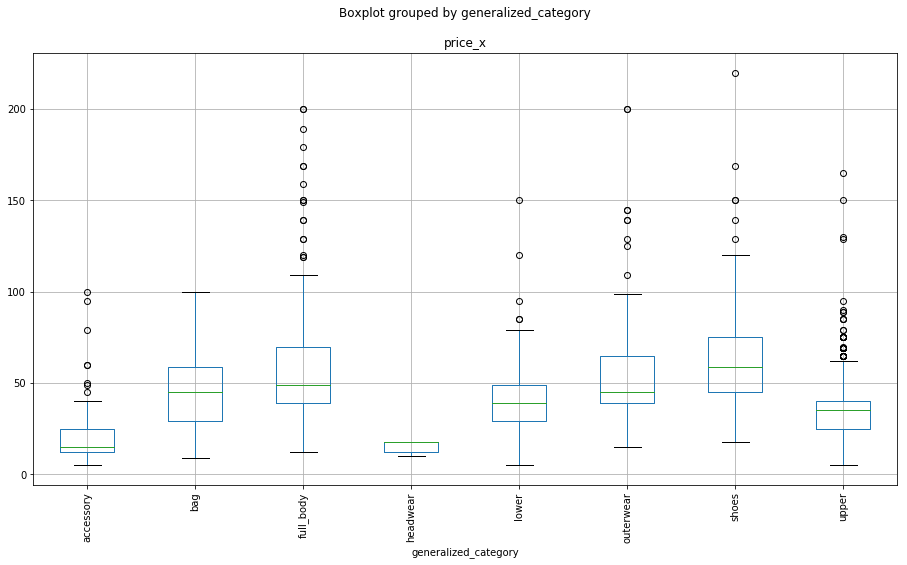

In [834]:
no_outliers.boxplot(column='price_x', by='generalized_category',figsize=(15,8),rot=90)
plt.savefig('data/box_plot_no_outliers.jpg')